# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('Dataset_Clustering.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# 1. Memahami struktur data
print("\nJumlah Baris dan Kolom:")
print(df.shape)

print("\nTipe Data Setiap Kolom:")
print(df.dtypes)


Jumlah Baris dan Kolom:
(2512, 16)

Tipe Data Setiap Kolom:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [4]:
# 2.Mengecek Missing Value
print(df.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


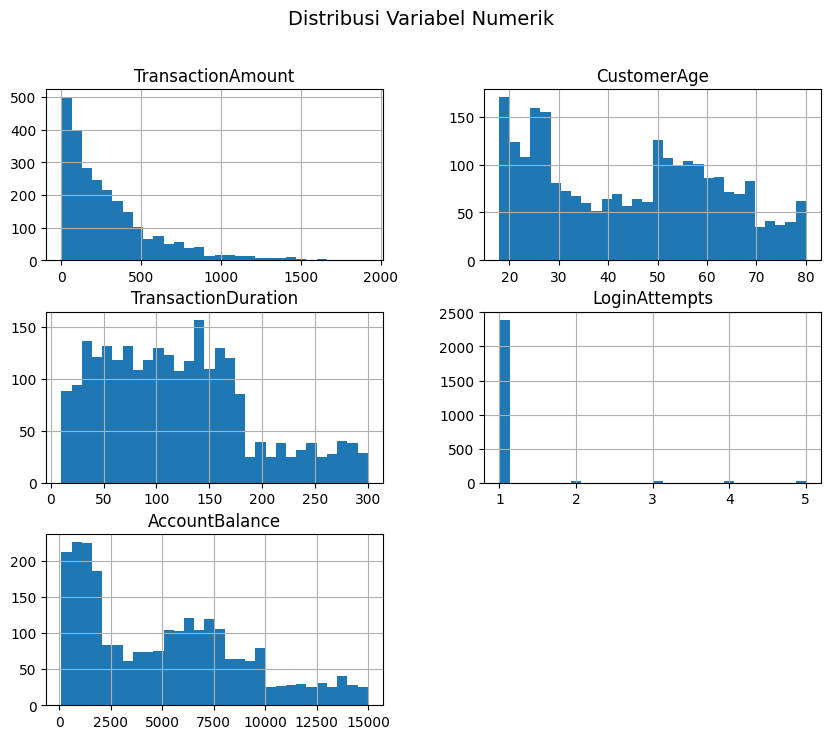

In [5]:
# 3. Analisis Distribusi Variabel Numerik
numerical_cols = df.select_dtypes(include=['number']).columns

df[numerical_cols].hist(figsize=(10, 8), bins=30)
plt.suptitle('Distribusi Variabel Numerik', fontsize=14)
plt.show()

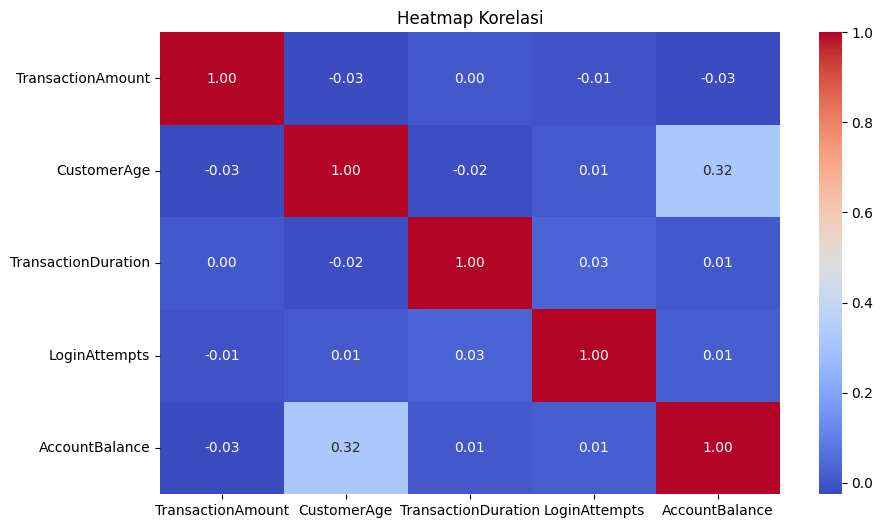

In [6]:
# Korelasi Antar Variabel Numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

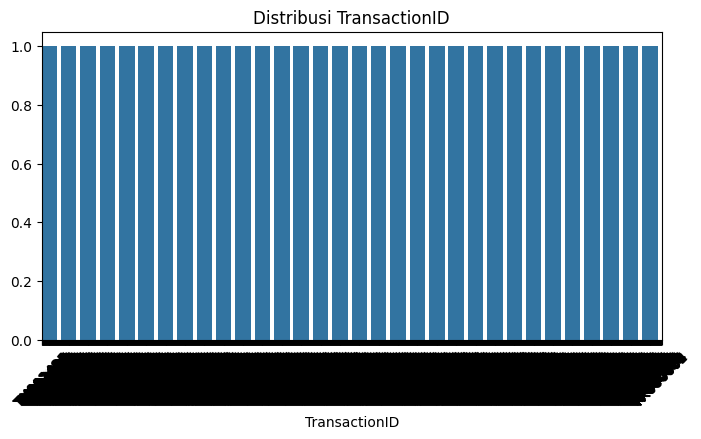

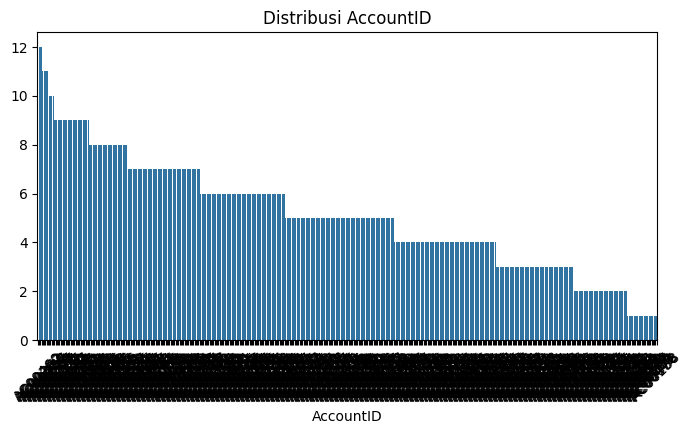

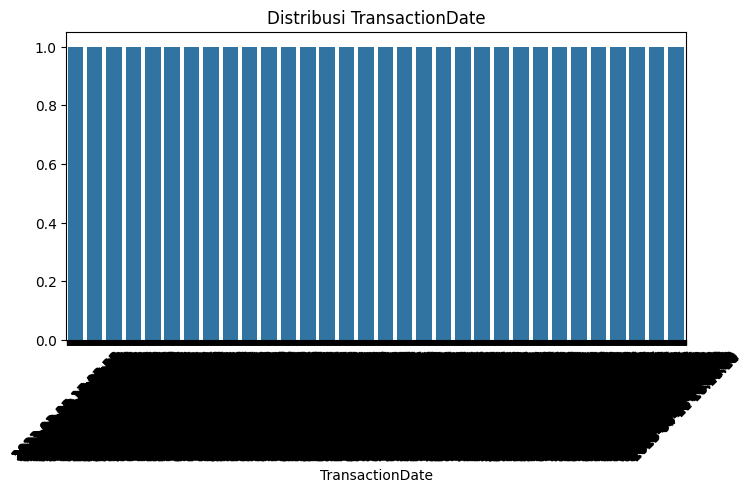

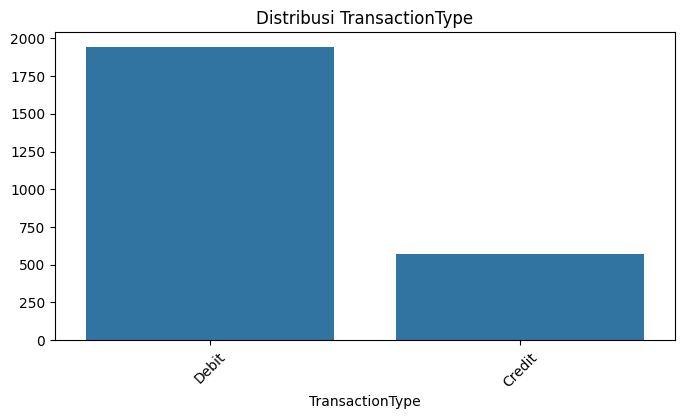

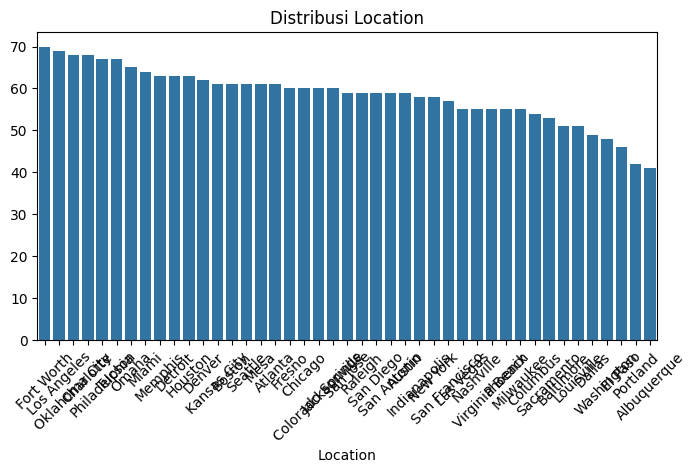

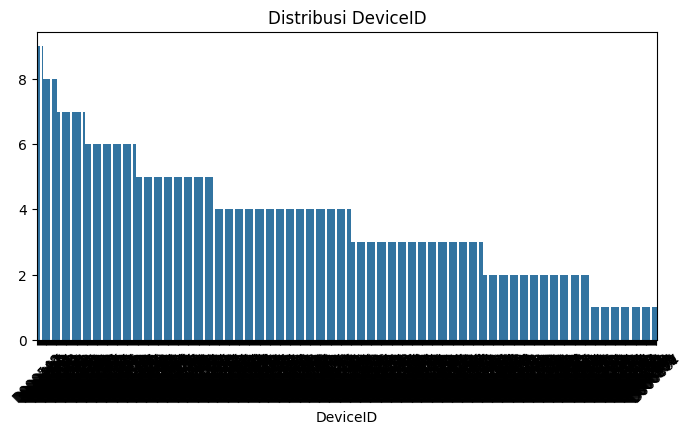

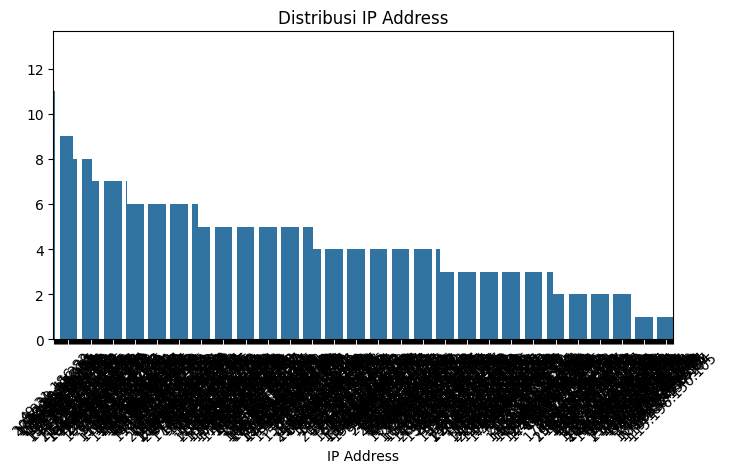

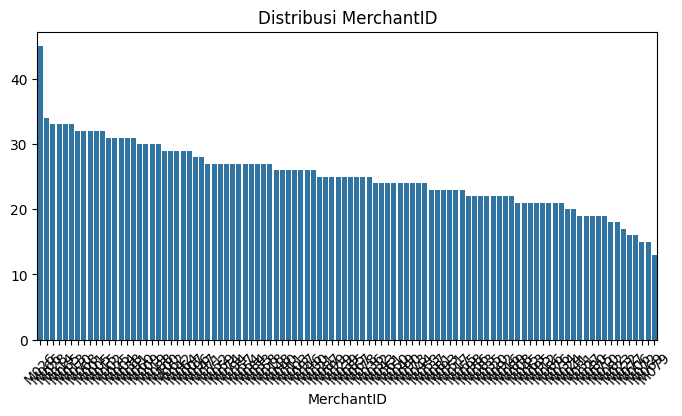

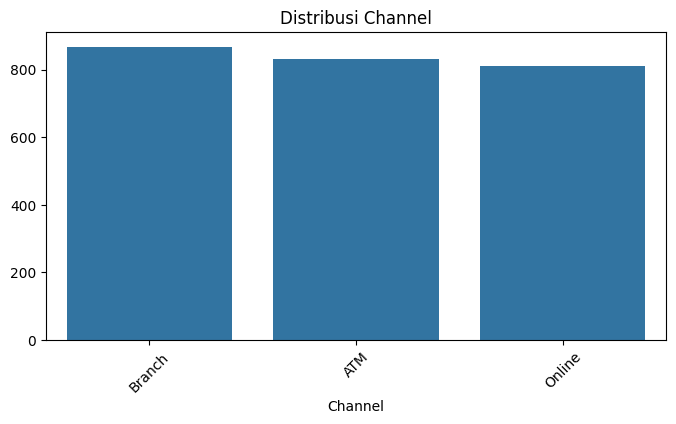

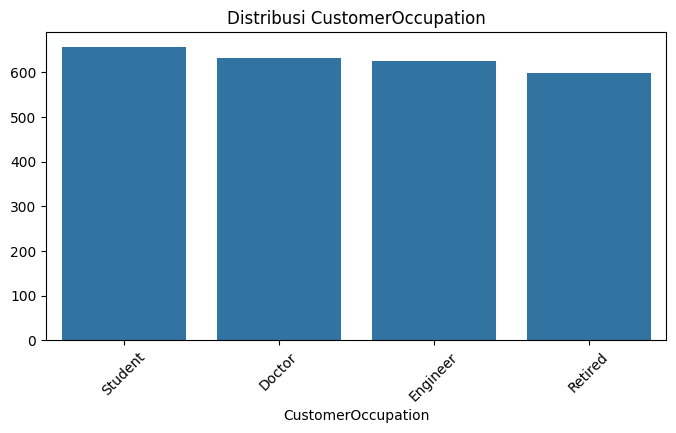

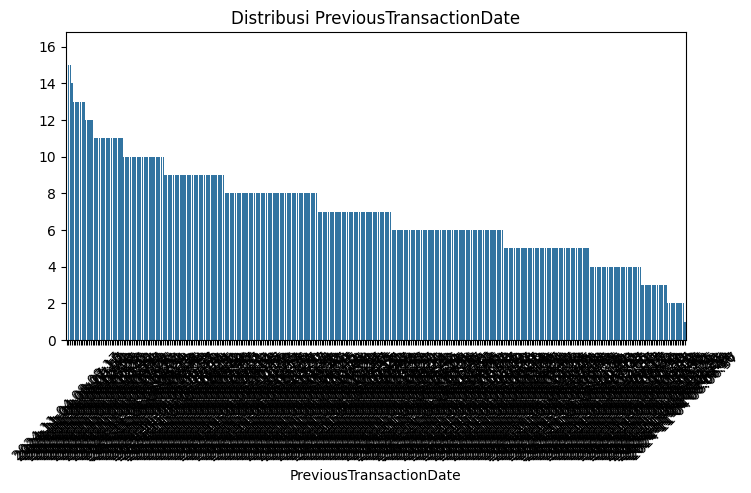

In [7]:
# 4. Grafik distribusi untuk variabel kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

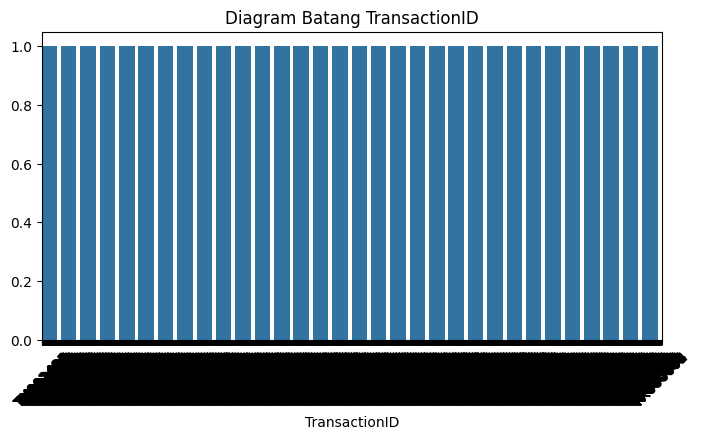

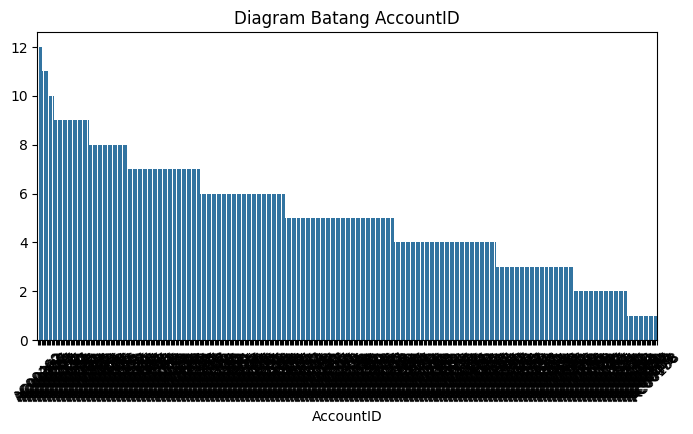

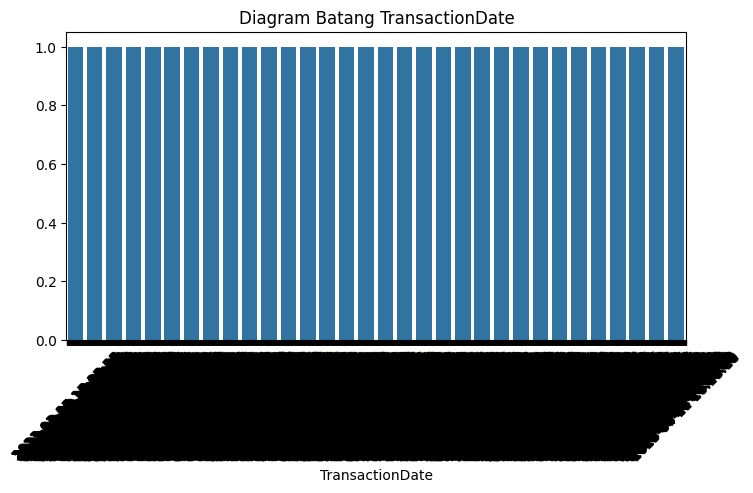

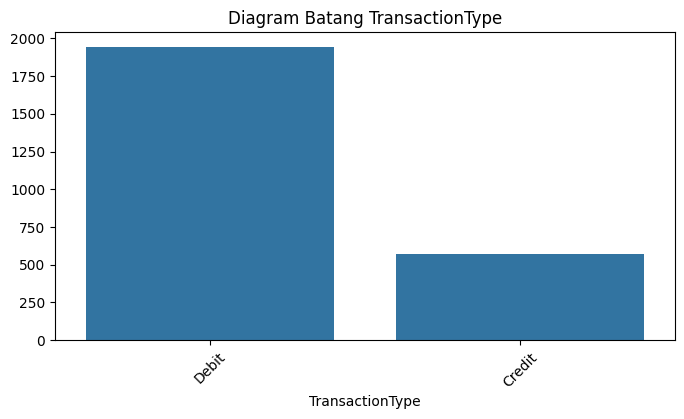

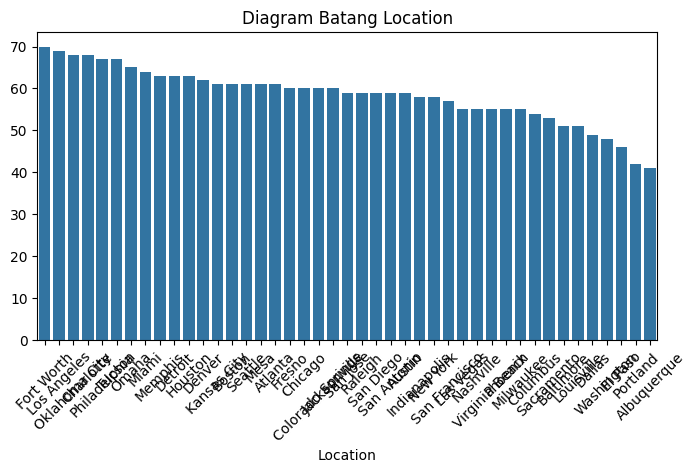

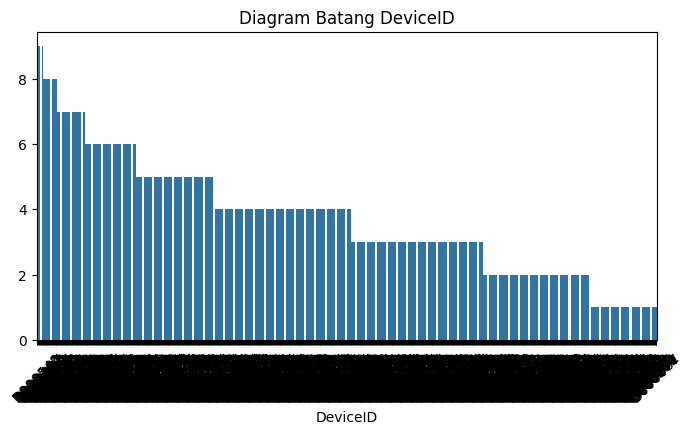

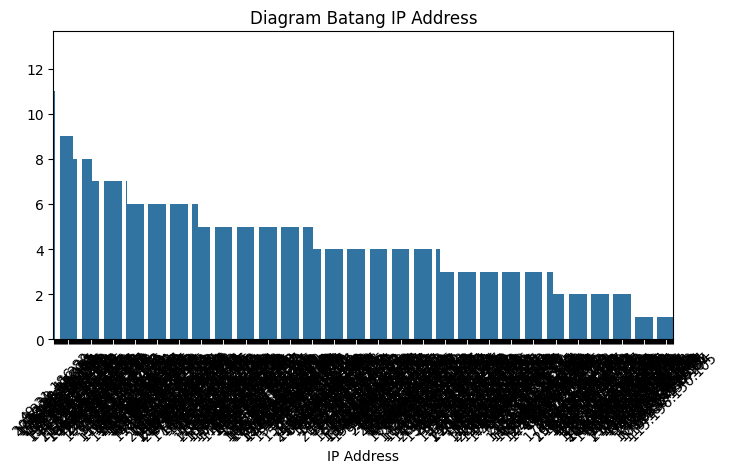

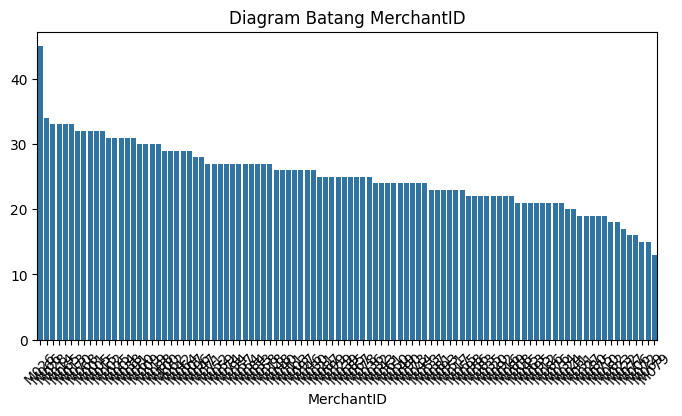

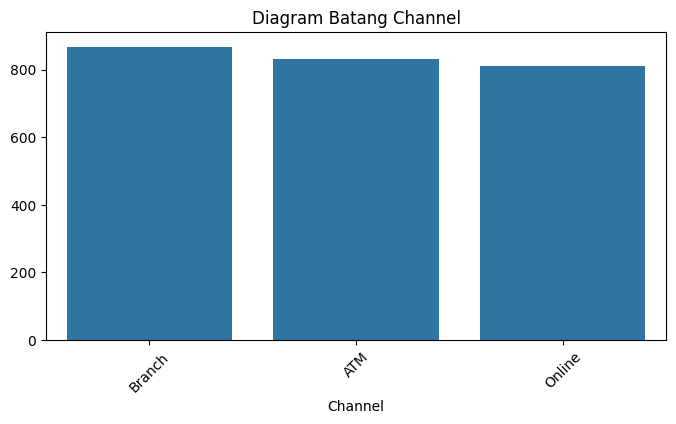

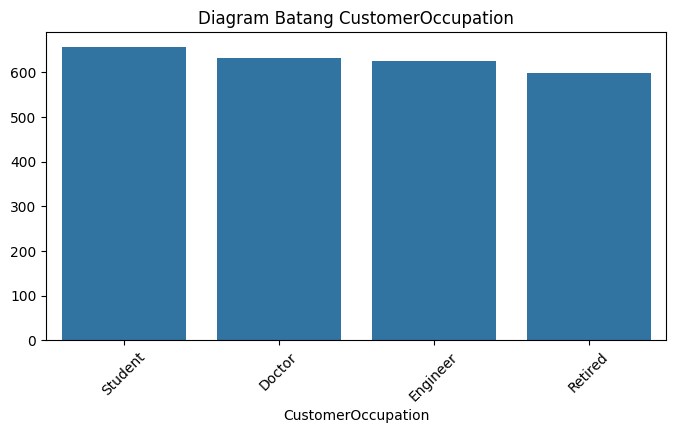

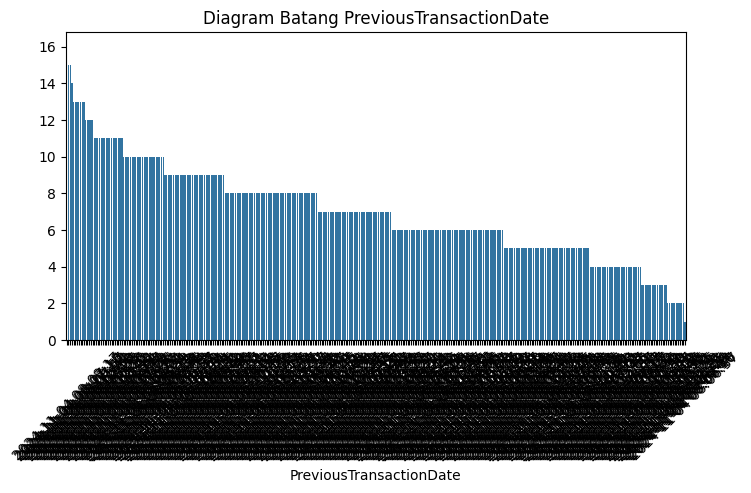

In [8]:
# Diagram batang untuk variabel kategorikal
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Diagram Batang {col}')
    plt.xticks(rotation=45)
    plt.show()

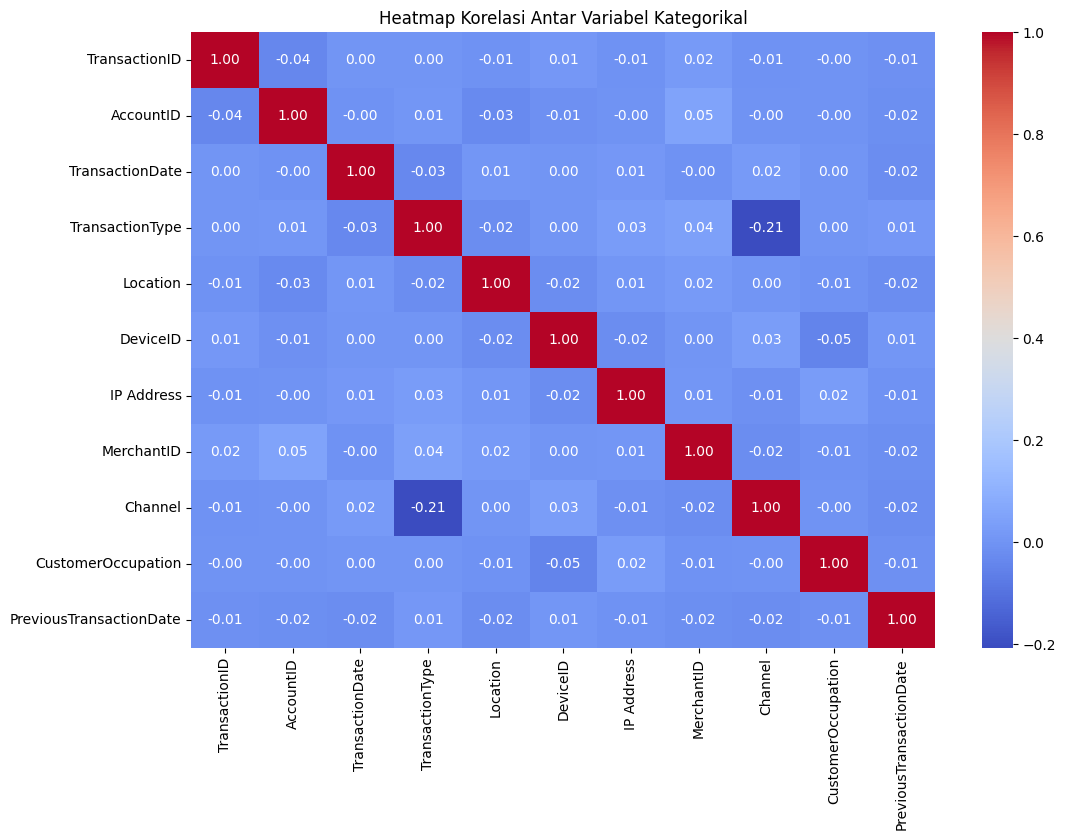

In [9]:
# Heatmap korelasi antar variabel kategorikal
df_encoded = df[categorical_cols].apply(LabelEncoder().fit_transform)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Kategorikal')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# Cek Missing Values
print(df.isnull().sum())
# Karena tidak ada missing values, jadi tidak perlu menangani missing value

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [11]:
# Fitur yang akan digunakan
selected_features = ["CustomerAge", "TransactionType"]
df_original = df[selected_features].copy()

In [12]:
# Salin data untuk preprocessing
df_normalized = df_original.copy()

In [13]:
# Label Encoding untuk fitur kategorikal
label_encoder = {}
categorical_features = ["TransactionType"]
for col in categorical_features:
    le = LabelEncoder()
    df_normalized[col] = le.fit_transform(df_normalized[col])
    label_encoder[col] = le

In [14]:
# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
df_normalized[["CustomerAge"]] = scaler.fit_transform(
    df_normalized[["CustomerAge"]]
)

In [15]:
df_preprocessed = df_normalized.copy()
df_preprocessed.head()

,CustomerAge,TransactionType
0,0.838710,1
1,0.806452,1
2,0.016129,1
3,0.129032,1
4,0.129032,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
# Melatih model K-Means dengan k=4
model_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_normalized["Cluster"] = model_kmeans.fit_predict(df_normalized)

# menampilkan hasil clustering pertama
df_normalized.head()

,CustomerAge,TransactionType,Cluster
0,0.838710,1,0
1,0.806452,1,0
2,0.016129,1,2
3,0.129032,1,2
4,0.129032,0,1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

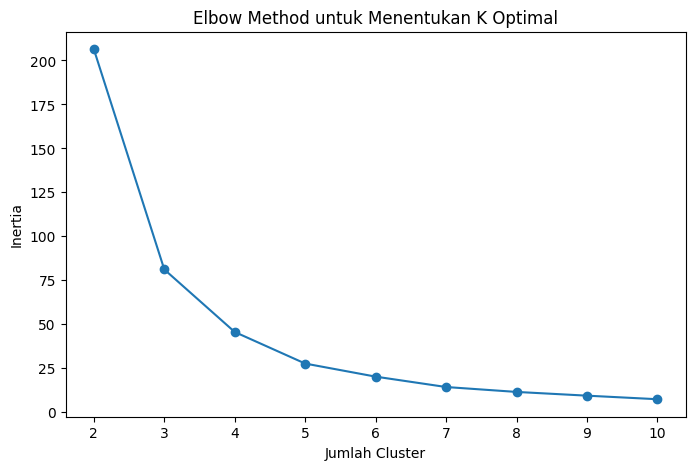

In [17]:
# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_preprocessed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.show()

In [18]:
# Menentukan jumlah cluster optimal dengan Silhouette Score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_preprocessed)
    sil_score = silhouette_score(df_preprocessed, cluster_labels)
    silhouette_scores.append(sil_score)

optimal_k = k_range[np.argmax(silhouette_scores)]
best_sil_score = max(silhouette_scores)

print("Jumlah Cluster Optimal:", optimal_k)
print("Silhouette Score Optimal:", best_sil_score)

Jumlah Cluster Optimal: 2
Silhouette Score Optimal: 0.6953416698726577


In [19]:
# Melatih model K-Means dengan jumlah cluster optimal
model_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_preprocessed['Cluster_KMeans'] = model_kmeans.fit_predict(df_preprocessed)

# Hitung Silhouette Score akhir
final_silhouette = silhouette_score(df_preprocessed, df_preprocessed['Cluster_KMeans'])
print("Final Silhouette Score:", final_silhouette)

Final Silhouette Score: 0.8965448512187538


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [20]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

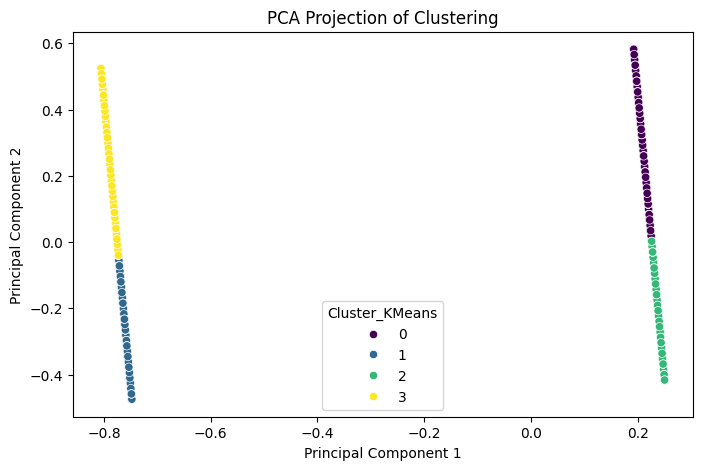

In [21]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_preprocessed.drop(columns=['Cluster_KMeans']))
plt.figure(figsize=(8, 5))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df_preprocessed["Cluster_KMeans"], palette="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Clustering")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [22]:
# 1. Tambahkan hasil label cluster ke DataFrame
df_normalized['Cluster'] = model_kmeans.labels_

# 2. Lakukan Inverse Transform pada fitur yang telah di-label encoding
df_normalized['TransactionType'] = label_encoder['TransactionType'].inverse_transform(df_normalized['TransactionType'])

# 3. Masukkan data yang sudah di-inverse ke dalam dataset asli
df_original['TransactionType'] = df_normalized['TransactionType']

# Cek hasil
print(df_original.head())

   CustomerAge TransactionType
0           70           Debit
1           68           Debit
2           19           Debit
3           26           Debit
4           26          Credit


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [23]:
df_normalized[["CustomerAge"]] = scaler.inverse_transform(df_normalized[["CustomerAge"]])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [24]:
cluster_summary = df_preprocessed.groupby('Cluster_KMeans').mean()
print(cluster_summary)

                CustomerAge  TransactionType
Cluster_KMeans                              
0                  0.680430              1.0
1                  0.174933              0.0
2                  0.172867              1.0
3                  0.678290              0.0


1. **Cluster 0**  
   - **CustomerAge**: 0.68 (usia lebih tua)  
   - **TransactionType**: 1.0 (transaksi tipe tertentu, mungkin lebih sering belanja online/premium)  
   - **Interpretasi**: Kelompok ini terdiri dari pelanggan yang lebih tua dan lebih sering melakukan jenis transaksi tertentu (mungkin transaksi premium atau investasi).  

2. **Cluster 1**  
   - **CustomerAge**: 0.67 (usia lebih tua)  
   - **TransactionType**: 0.0 (jenis transaksi berbeda dengan Cluster 0)  
   - **Interpretasi**: Pelanggan lebih tua tapi lebih cenderung ke transaksi yang berbeda (bisa jadi transaksi kebutuhan dasar atau lebih konservatif dalam belanja).  

3. **Cluster 2**  
   - **CustomerAge**: 0.17 (usia lebih muda)  
   - **TransactionType**: 1.0 (sering melakukan jenis transaksi yang sama dengan Cluster 0)  
   - **Interpretasi**: Kelompok anak muda yang cenderung aktif dalam transaksi premium atau digital. Bisa jadi segmen pelanggan muda yang tech-savvy.  

4. **Cluster 3**  
   - **CustomerAge**: 0.17 (usia lebih muda)  
   - **TransactionType**: 0.0 (jenis transaksi berbeda dari Cluster 2)  
   - **Interpretasi**: Kelompok pelanggan muda yang mungkin lebih hemat atau melakukan transaksi lebih konvensional.  

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [25]:
df_preprocessed.to_csv("Dataset_Inisiasi.csv", index=False)